# 🖼️ Generating Figure 5

The following code shows how to obtain the maps from Figure 5 showing the difference in predictions of a given species in the unconditioned case and when
all other bird species’ encounter rates are known.

This assumes that predictions of the model in the unconditioned case as well as in the conditioned case for a given species have been saved to the 'unconditioned_path' and 'conditioned_path' folders defined at the top of the notebook.For each hotspot, you should have a .npy file in each of these foders. 

In [1]:
import numpy as np
import os
import pandas as pd

In [45]:
unconditioned_path= "/predictions/ciso/unconditioned"
conditioned_path =  "/predictions/ciso/woodduck_conditioned"

In [ ]:
with open("/data/SatBird_data_v2/USA_summer/species_list_USA.txt", "r") as f:
    list_species = [u.strip("\n") for u in f.readlines()]

In [7]:
#for example, for the wood duck
indexq = np.where(np.array(list_species)=="Aix sponsa")[0][0]

#indicate species names: "Callipepla californica" for the California quail, "Junco hyemalis" for the dark-eyed junco and "Turdus migratorius" for the American robin

In [ ]:
index = 631

In [51]:
test_split = pd.read_csv("/data/SatBird_data_v2/USA_summer/test_split.csv")

In [52]:
test_split["unc"] = 0.
test_split["cond"] = 0.


In [53]:
#fill rows of test hotspots with values of predictions for the species of interest in the unconditioned and conditioned cases
for i, row in test_split.iterrows():
    pred = np.load(os.path.join(unconditioned_path, row["hotspot_id"]+".npy"))[indexq]
    test_split.loc[i, "unc"] = pred
    pred_cond = np.load(os.path.join(conditioned_path, row["hotspot_id"]+".npy"))[indexq]
    test_split.loc[i, "cond"] = pred_cond

### get ground truth predictions

In [54]:
import pickle
birds_targets = "/data/SatBird_data_v2/USA_summer/satbird_usa_summer_targets.pkl"
with open(birds_targets, "rb") as f:
    birddata = pickle.load(f)

In [55]:
hotspots = test_split["hotspot_id"].to_list()
birddata_test = {i:birddata[i] for i in birddata.keys() if i in hotspots}
list_keys = list(birddata_test.keys())
len(list_keys)
gt = np.zeros((len(list_keys)))
for i in range(len(list_keys)):
    gt[i] = birddata_test[list_keys[i]][indexq]

In [57]:
test_split["ground_truth"] = 0.
for i, row in test_split.iterrows():  
    pred_gt =birddata_test[row["hotspot_id"]][indexq]
    test_split.loc[i, "ground_truth"] = pred_gt

### make maps

In [58]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

test_split_ = test_split[["lon", "lat", "unc", "cond", "ground_truth"]]

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(test_split_ , geometry=gpd.points_from_xy(test_split_ ['lon'], test_split_ ['lat']))
gdf= gdf.sort_values(by='unc', ascending=True)




In [61]:

# Define a nonlinear transformation
def custom_norm(value):
    return np.interp(value, [0, 0.7, 1], [0, 0.5, 1])  # Squishes values between 0.7 and 1

# Create a normalization object
norm = mcolors.PowerNorm(gamma=0.5, vmin=0, vmax=1) 



In [62]:
geoDatav = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')



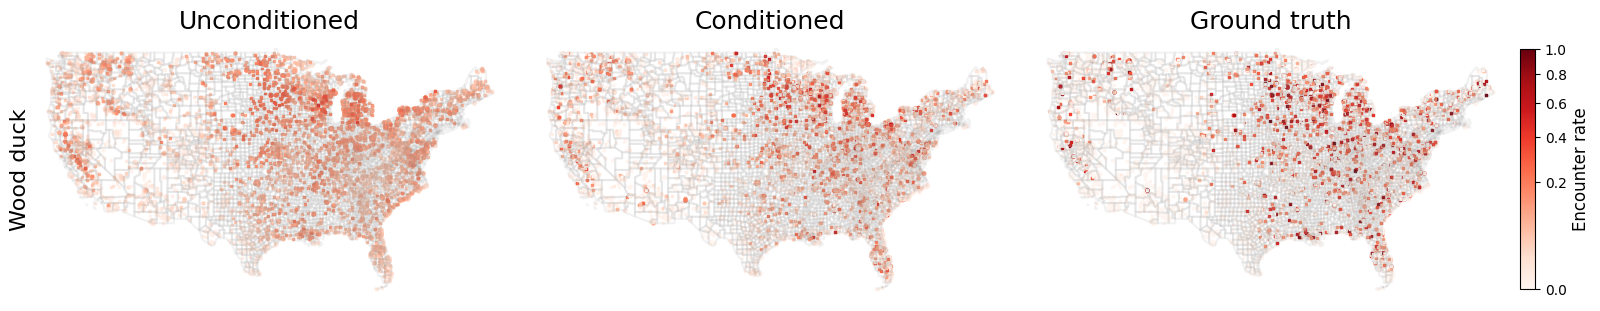

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm


# Set up the figure and axes
fig, axarr = plt.subplots(1, 3, figsize=(15, 6), constrained_layout=True)

# Define a colormap and normalization
cmap = plt.cm.Reds

# Plot each GeoDataFrame - don't specify any norm 
gdf.plot(column='unc', cmap=cmap, marker='s', markersize=2, ax=axarr[0], legend=False, norm=norm)
gdf.plot(column='cond', cmap=cmap, marker='s', markersize=2, ax=axarr[1], legend=False, norm=norm)
gdf.plot(column='ground_truth', cmap=cmap, marker='s', markersize=2, ax=axarr[2], legend=False, norm=norm)

# Remove axis labels for clarity
for i, ax in enumerate(axarr):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)  # Removes the square border
    ax.axis("off")
    geoDatav[~geoDatav["STATE"].isin(["02", "15", "72"])].boundary.plot(ax=ax, alpha = 0.1, edgecolor = "gray" )
    if i ==0:
        ax.set_title("Unconditioned", fontsize = 18)  # Set different titles if needed
    if i ==1:
        ax.set_title("Conditioned", fontsize = 18)
    if i==2: 
        ax.set_title("Ground truth", fontsize = 18)

# Create a single colorbar below the maps
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar creation
plt.figtext(0.0, 0.5, "Wood duck", fontsize=16, ha="center", va="center", rotation=90)
cbar_ax = fig.add_axes([1, 0.3, 0.01, 0.4])  # [left, bottom, width, height] --> Right side
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('Encounter rate', fontsize = 12)
plt.savefig("woodduck_reds_new_scales.png",  bbox_inches='tight')
plt.show()


In [ ]:
#Example output for the American Robin (change the species at the top of the notebook)

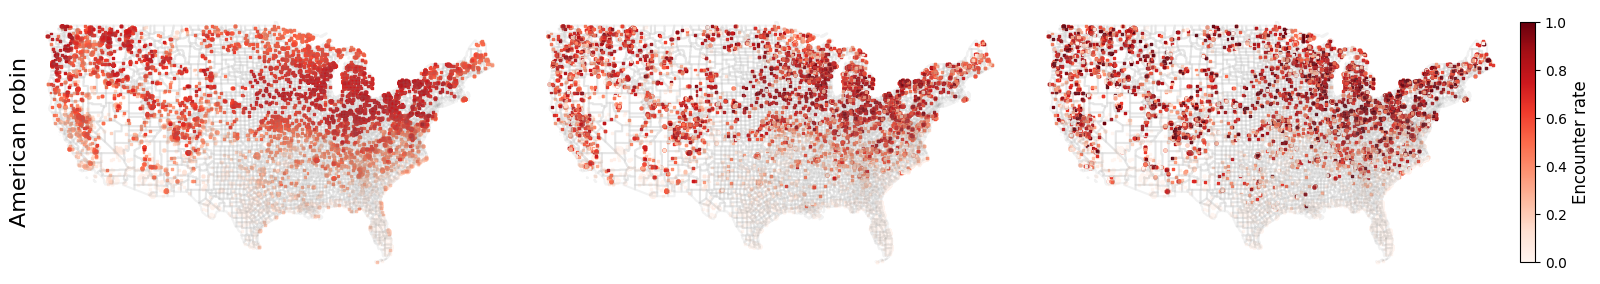

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Load or create example GeoDataFrames


# Set up the figure and axes
fig, axarr = plt.subplots(1, 3, figsize=(15, 6), constrained_layout=True)

# Define a colormap and normalization
cmap = plt.cm.Reds
norm = mcolors.PowerNorm(gamma=1, vmin=0, vmax=1) 
# Plot each GeoDataFrame
gdf.plot(column='unc', cmap=cmap, marker='s', markersize=2, ax=axarr[0], legend=False, norm=norm)
gdf.plot(column='cond', cmap=cmap, marker='s', markersize=2, ax=axarr[1], legend=False, norm=norm)
gdf.plot(column='ground_truth', cmap=cmap, marker='s', markersize=2, ax=axarr[2], legend=False, norm=norm)

# Remove axis labels for clarity
for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)  # Removes the square border
    ax.axis("off")
    geoDatav[~geoDatav["STATE"].isin(["02", "15", "72"])].boundary.plot(ax=ax, alpha = 0.1, edgecolor = "gray" )
    #ax.set_title("Map Title")  # Set different titles if needed

# Create a single colorbar below the maps
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar creation
plt.figtext(0.0, 0.5, "American robin", fontsize=16, ha="center", va="center", rotation=90)
cbar_ax = fig.add_axes([1, 0.3, 0.01, 0.4])  # [left, bottom, width, height] --> Right side
cbar = plt.colorbar(sm, cax=cbar_ax, orientation='vertical')
cbar.set_label('Encounter rate',  fontsize = 12)
plt.savefig("amerirobin_reds.png",  bbox_inches='tight')
plt.show()
